In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np

In [2]:
## Gerar a semente de números aleatórios

np.random.seed(42)
torch.manual_seed(42)

In [4]:
#numero de "amostras", ex.: número de ângulos
num_samples = 100

#dados de treino: 100 números aleatórios entre 0 e 4pi
angles_train = np.random.uniform(0, 4 * np.pi, num_samples).reshape(-1,1)

#dados de saída: um array em que cada elemento é o seno de cada número do
#angles_train mais um ruído.
sin_values_train = np.sin(angles_train) + np.random.normal(0, 0.1, size=angles_train.shape)

#Agora convertemos os arrays de entrada e saída acima para tensores.
x_train = torch.tensor(angles_train, dtype=torch.float32)
y_train = torch.tensor(sin_values_train, dtype=torch.float32)

In [6]:
#cria a rede neural

class nnfs(nn.Module):
  def __init__(self, hidden_layers=[10,10,10]):

    super(nnfs, self).__init__()

    layers = []
    input_size = 1
    for hidden_size in hidden_layers:
      layers.append(nn.Linear(input_size, hidden_size))

      layers.append(nn.Tanh())

      input_size = hidden_size #

    layers.append(nn.Linear(input_size,1))

    self.model = nn.Sequential(*layers)

  def forward(self,x):
    return self.model(x)



model = nnfs(hidden_layers=[10,10,10])

In [7]:
#Função de perda e otimizador
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(),lr=0.001)

In [8]:
#Treinamento da rede
epochs = 5000
for epoch in range(epochs):
  model.train()
  optimizer.zero_grad()
  outputs = model(x_train)
  loss = criterion(outputs,y_train)
  loss.backward()
  optimizer.step()
  if (epoch+1) % 500 == 0:
    print(f"Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.6f}")

Epoch [500/5000], Loss: 0.317321
Epoch [1000/5000], Loss: 0.047150
Epoch [1500/5000], Loss: 0.011851
Epoch [2000/5000], Loss: 0.007662
Epoch [2500/5000], Loss: 0.007159
Epoch [3000/5000], Loss: 0.007075
Epoch [3500/5000], Loss: 0.007039
Epoch [4000/5000], Loss: 0.007014
Epoch [4500/5000], Loss: 0.006998
Epoch [5000/5000], Loss: 0.006990


In [9]:
#Modo eval(), previsão da rede

model.eval()
angles_test = np.linspace(0, 6 * np.pi, 100).reshape(-1, 1)
x_test = torch.tensor(angles_test, dtype=torch.float32)
with torch.no_grad():
    predictions = model(x_test).numpy()

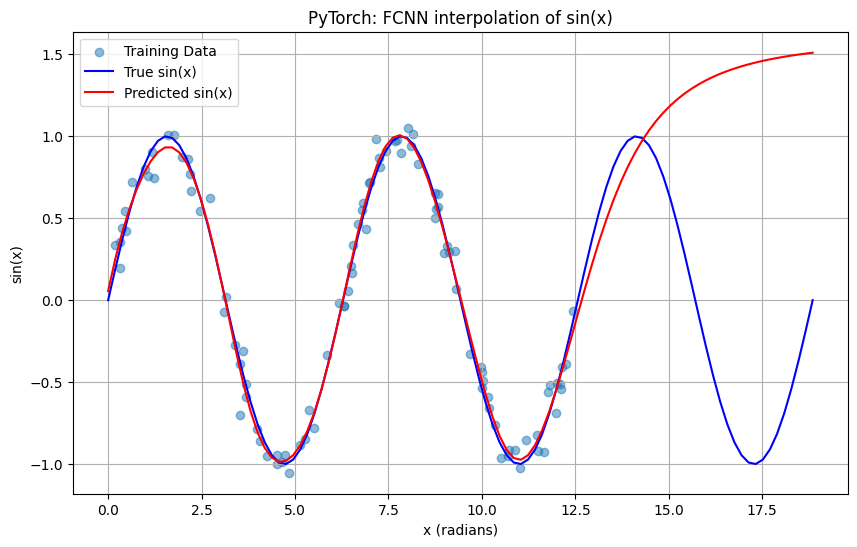

In [11]:
#Visualização

plt.figure(figsize=(10,6))
plt.scatter(angles_train, sin_values_train, label='Training Data', alpha=0.5)
plt.plot(angles_test, np.sin(angles_test), label='True sin(x)', color='blue')
plt.plot(angles_test, predictions, label='Predicted sin(x)', color='red')
plt.title('PyTorch: FCNN interpolation of sin(x)')
plt.xlabel('x (radians)')
plt.ylabel('sin(x)')
plt.legend()
plt.grid(True)
plt.show()